In [2]:
import math
import sys

sys.path.append("..")

import torch
import transformers

import pandas as pd

from utils import add_attn_hooks

# text_dir = "rtl"
text_dir = "ltr"
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")
model = transformers.AutoModelForMaskedLM.from_pretrained(f"/home/sipb/nlp-class-project/checkpoints/bert_base_{text_dir}/epoch_3_checkpt", ignore_mismatched_sizes=True)

# tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
# model = transformers.AutoModelForMaskedLM.from_pretrained(f"/home/sipb/nlp-class-project/checkpoints/distilbert_base_{text_dir}/epoch_3_checkpt", ignore_mismatched_sizes=True)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at /home/sipb/nlp-class-project/checkpoints/bert_base_ltr/epoch_3_checkpt were not used when initializing BertForMaskedLM: ['at

In [3]:
add_attn_hooks(model, text_dir)
model.eval();

In [5]:
df = pd.read_parquet('/home/sipb/nlp-class-project/data/japan.parquet')

In [14]:
df["text"][0]
import codecs
decoded_str = codecs.escape_decode(df["text"][0])[0].decode('utf-8')
print(decoded_str)

b'
_START_ARTICLE_
ビートたけしの教科書に載らない日本人の謎
_START_SECTION_
概要
_START_PARAGRAPH_
「教科書には決して載らない」日本人の謎やしきたりを多角的に検証し、日本人のDNAを解明する。_NEWLINE_新春番組として定期的に放送されており、年末の午前中に再放送されるのが恒例となっている。'


In [32]:
input_text = ["Q: Where do pandas live? A:"]#, "ビートたけしの教科書に載らない日"]
batch = tokenizer(input_text, return_tensors="pt", padding_side="right", padding="max_length", max_length=64)
output_ids = model.generate(batch['input_ids'], max_length=128, do_sample=False)  # do_sample=False ensures greedy decoding
decoded_output = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(decoded_output)

q : where do pandas live? a : (,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, and,, (,,,,,,.,,,,,,,,,,,,, and


In [17]:
with torch.inference_mode():
    batch = tokenizer(["ビートたけしの教科書に載らない日本人の謎"], return_tensors="pt", padding_side="left" if text_dir == "rtl" else "right", padding="max_length", max_length=128)
    output = model(**batch)
    print(output)
    

MaskedLMOutput(loss=None, logits=tensor([[[ -7.9645,  -7.6722,  -7.8979,  ...,  -8.6562,  -8.2586,  -6.7448],
         [-11.1255, -11.2591, -11.3443,  ..., -10.1338, -11.9891, -10.2974],
         [ -8.1256,  -8.1880,  -7.9874,  ...,  -8.0597,  -8.6987, -10.2472],
         ...,
         [-14.5633, -14.4418, -14.4735,  ..., -14.5651, -14.2234, -13.5610],
         [-18.9095, -18.6487, -18.7593,  ..., -19.1327, -18.8564, -17.4334],
         [-17.8532, -17.6451, -17.7208,  ..., -18.0046, -17.7334, -16.5670]]]), hidden_states=None, attentions=None)


In [15]:
# CPU is fast enough

ppls = []
for riddle in riddles:
    batch = tokenizer([riddle], return_tensors="pt", padding_side="left" if text_dir == "rtl" else "right", padding="max_length", max_length=128)
    batch["labels"] = batch["input_ids"].clone()
    batch["labels"][batch["attention_mask"] == 0] = -100
    # batch = tokenizer([riddle], return_tensors="pt")#, padding_side="left" if text_dir == "rtl" else "right", padding="longest", max_length=128)
    # batch["labels"] = batch["input_ids"]
    with torch.inference_mode():
        output = model(**batch)
        ppls.append(math.e ** output.loss.item())

NameError: name 'riddles' is not defined

In [39]:
sum(ppls) / len(ppls), text_dir

(692.7175314596647, 'rtl')

In [43]:
sum(ppls) / len(ppls), text_dir

(616.6241458855995, 'ltr')

In [35]:
sum(ppls) / len(ppls), text_dir  # distilbert

(526.979384061791, 'rtl')

In [31]:
sum(ppls) / len(ppls), text_dir  # distilbert

(288.22724792187364, 'ltr')

In [21]:
sum(ppls) / len(ppls)

937.8557468023619

In [58]:
batch

{'input_ids': tensor([[  101,  1045,  2064,  2022,  2524,  1010,  2021,  1045,  2572,  2025,
          5024,  1012,  2054,  2572,  1045,  1029,  1037, 15117,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

(array([ 4.,  6., 11.,  6.,  5.,  2.,  1.,  1.,  2.,  2.]),
 array([ 613.56297843,  829.36555779, 1045.16813716, 1260.97071653,
        1476.77329589, 1692.57587526, 1908.37845463, 2124.18103399,
        2339.98361336, 2555.78619272, 2771.58877209]),
 <BarContainer object of 10 artists>)

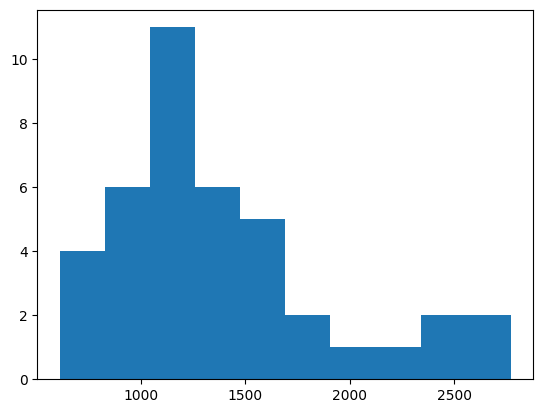

In [16]:
import matplotlib.pyplot as plt

plt.hist(ppls)

In [14]:
ppls

[956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414,
 956.7294281325414]